<a href="https://colab.research.google.com/github/SylviaMwai/NFL-Players-Analytics-EDA-/blob/main/NFL_Players_Analytics_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALYZING NFL PLAYERS DATASET**

## 1. BUSINESS UNDERSTANDING

#### a) PERSPECTIVE

In the world of professional American football, understanding players' **physical and demographic attributes** is essential for making informed decisions in coaching, recruitment, player development, and sports analytics. Each player's position demands a different set of physical characteristics, and patterns in height, weight, and age can offer insights into the strategies behind team formation and talent scouting.

This project explores the **NFL player dataset** to uncover patterns in player profiles, including physical measurements, age, and educational background. Such exploratory analysis helps establish a baseline understanding of the kinds of athletes who succeed in different positions, which schools produce NFL talent, and how positions vary regarding player size and age.

This type of analysis also supports **sports scientists, coaches, and analysts** in:

• Comparing physical attributes across positions

• Identifying outliers or unique players

• Understanding talent pipelines (e.g., top colleges)

#### b) OBJECTIVES

The main objective of this project is to perform a thorough **Exploratory Data Analysis (EDA)** of NFL players using structured, interpretable visual and statistical tools.

This analysis aims to:

• Understand the **distribution of player positions**

• Examine **average height and weight** and how they vary by position

• Calculate player **ages** from birthdates

• Analyze the **educational background** by identifying colleges producing the most NFL athletes

Key goals include:

• Identifying **position-specific physical patterns**

• Providing a **visual profile** of player attributes

• Highlighting potential **outliers or unique cases**

• Building a **strong foundation** for future predictive modelling tasks (e.g., injury risk, performance, or draft value)

This project is valuable in building domain familiarity and data storytelling for aspiring sports data scientists.


In [1]:
import pandas as pd
import numpy as np

## 2. DATA UNDERSTANDING

In [2]:
Data = pd.read_csv("/content/players.csv")
Data.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [3]:
Data.info()
Data.describe(include= "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


,nflId,height,weight,birthDate,collegeName,position,displayName
count,1.303000e+03,1303,1303.000000,1303,1303,1303,1303
unique,NaN,29,NaN,1150,251,21,1298
top,NaN,73,NaN,1989-04-26,Alabama,WR,Isaiah Johnson
freq,NaN,159,NaN,4,33,228,2
mean,2.416518e+06,NaN,222.537222,NaN,NaN,NaN,NaN
std,5.333335e+05,NaN,29.476747,NaN,NaN,NaN,NaN
min,2.520000e+02,NaN,159.000000,NaN,NaN,NaN,NaN
25%,2.539662e+06,NaN,200.000000,NaN,NaN,NaN,NaN
50%,2.553658e+06,NaN,216.000000,NaN,NaN,NaN,NaN
75%,2.558184e+06,NaN,242.000000,NaN,NaN,NaN,NaN


In [4]:
Data.dtypes

,0
nflId,int64
height,object
weight,int64
birthDate,object
collegeName,object
position,object
displayName,object


## 3. DATA CLEANING

In [5]:
#Removing duplicates
Data.drop_duplicates(inplace=True)
Data.head(8)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole
7,2507763,6-0,200,08/01/1986,Mississippi,WR,Mike Wallace


In [6]:
Data.isna().any()

,0
nflId,False
height,False
weight,False
birthDate,False
collegeName,False
position,False
displayName,False


In [7]:
#missing values for non-numerics
#The lambda function applies the mode function to each non-numeric column and returns the most frequent value.
Data.fillna(Data.select_dtypes(exclude=np.number).apply(lambda x: x.mode()[0]), inplace=True)
Data.sample(10)

,nflId,height,weight,birthDate,collegeName,position,displayName
1233,2561279,6-3,210,12/30/1995,Arkansas-Monticello,WR,Jalen Tolliver
306,2558019,70,215,1995-07-25,Tennessee,RB,Alvin Kamara
270,2508101,75,255,1988-07-23,Brown,FB,James Develin
1147,2541848,75,235,1990-07-18,West Alabama,OLB,Deon Lacey
839,2556798,73,180,1992-05-16,Youngstown State,CB,Kenneth Durden
499,2495888,78,267,1984-05-19,UCLA,TE,Marcedes Lewis
22,2552453,73,210,1993-04-16,Indiana,RB,Tevin Coleman
119,2552289,76,269,1993-02-12,Kentucky,OLB,Bud Dupree
1243,2551359,75,250,1991-05-25,Southern Connecticut State,TE,Jerome Cunningham
706,2556673,76,263,1993-07-31,Stanford,OLB,Brennan Scarlett


In [8]:
numeric_cols = Data.select_dtypes(include=['number']).columns
# Function to detect outliers using IQR
def detect_outliers(Data, columns):
    outliers = {}
    for col in columns:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)][col]
    return outliers

# Check for outliers in numerical columns
outliers_dict = detect_outliers(Data, numeric_cols)

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

# Drop rows with outliers from the data DataFrame
data = Data[~((Data[numeric_cols] < (Data[numeric_cols].quantile(0.25) - 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25)))) |
               (Data[numeric_cols] > (Data[numeric_cols].quantile(0.75) + 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25))))).any(axis=1)]

# Print the final DataFrame after dropping outliers
print("Final DataFrame after dropping outliers:")
print(data.head(30))

Outliers in nflId:
7       2507763
14      2506467
19          310
20      2495454
21      2507828
         ...   
1271    2505801
1272    2506677
1277        252
1289     496816
1290     496843
Name: nflId, Length: 193, dtype: int64


Outliers in weight:
78      311
496     318
956     307
1034    345
1069    347
1092    314
1099    329
1122    310
1138    318
1162    309
1163    350
1185    336
1216    315
1217    320
1218    314
1222    352
1224    313
1239    332
1259    315
1260    310
1292    347
Name: weight, dtype: int64


Final DataFrame after dropping outliers:
      nflId height  weight   birthDate             collegeName position  \
0   2539334     72     190  1990-09-10              Washington       CB   
1   2539653     70     186  1988-11-01  Southeastern Louisiana       CB   
2   2543850     69     186  1991-12-18                  Purdue       SS   
3   2555162     73     227  1994-11-04         Louisiana State      MLB   
4   2555255     75     232  1993-07-01         

In [9]:
def height_to_inches(h):
    try:
        if '-' in str(h):  # feet-inches format
            feet, inches = map(int, h.split('-'))
            return feet * 12 + inches
        else:
            return int(h)  # already in inches
    except:
        return None

# Replace 'height' column with cleaned inches
Data['height'] = Data['height'].apply(height_to_inches)

# Show result
print(Data)

        nflId  height  weight   birthDate             collegeName position  \
0     2539334      72     190  1990-09-10              Washington       CB   
1     2539653      70     186  1988-11-01  Southeastern Louisiana       CB   
2     2543850      69     186  1991-12-18                  Purdue       SS   
3     2555162      73     227  1994-11-04         Louisiana State      MLB   
4     2555255      75     232  1993-07-01               Minnesota      OLB   
...       ...     ...     ...         ...                     ...      ...   
1298  2553798      74     235  09/17/1991              Vanderbilt       LS   
1299  2556814      74     200  05/17/1994                    Duke       WR   
1300  2552576      78     231  1992-04-25            Oregon State       QB   
1301  2561469      69     187  1993-03-15      Alabama-Birmingham       CB   
1302  2558095      74     196  10/12/1995                     LSU       WR   

             displayName  
0        Desmond Trufant  
1        

In [10]:
Data.sample(12)

,nflId,height,weight,birthDate,collegeName,position,displayName
799,2541966,75,204,1990-01-08,Clemson,WR,Jaron Brown
288,2558061,72,192,1996-05-20,Ohio State,CB,Marshon Lattimore
276,2543600,74,225,04/27/1991,LSU,RB,Alfred Blue
594,2558875,76,232,1994-11-23,Oregon,TE,Johnny Mundt
281,2556466,71,225,1994-02-27,Auburn,RB,Peyton Barber
334,2543614,74,215,1993-08-06,Mississippi,WR,Donte Moncrief
194,2555320,74,242,07/08/1993,UCLA,OLB,Aaron Wallace
691,2555478,73,203,1994-09-21,Florida,WR,Demarcus Robinson
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
77,2505660,75,265,1982-10-11,Arizona State,OLB,Terrell Suggs


## 4. DATA VISUALIZATION

#### a) UNIVARIATE ANALYSIS

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-24-2052181707>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')


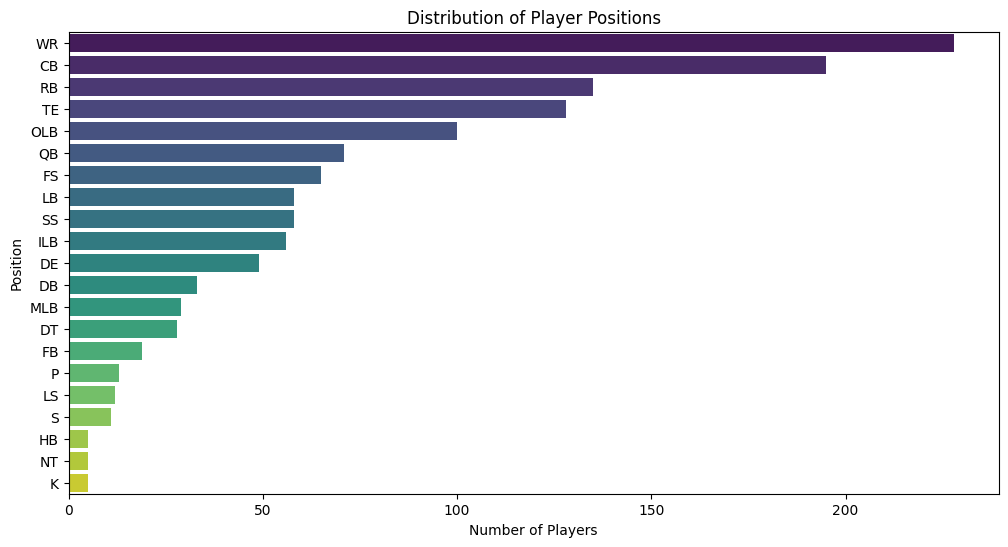

In [24]:
# Distribution of player positions
plt.figure(figsize=(12, 6))
sns.countplot(y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')
plt.title('Distribution of Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()

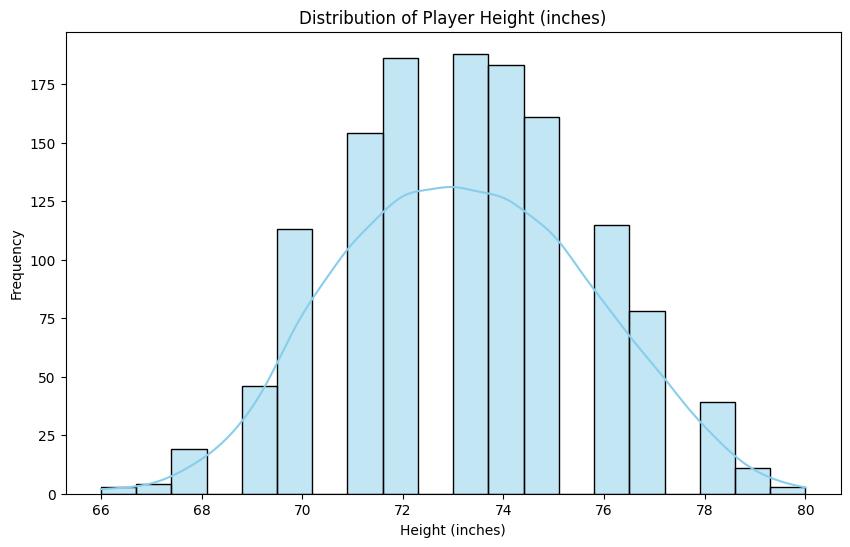

In [23]:
# Distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(Data['height'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Height (inches)')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

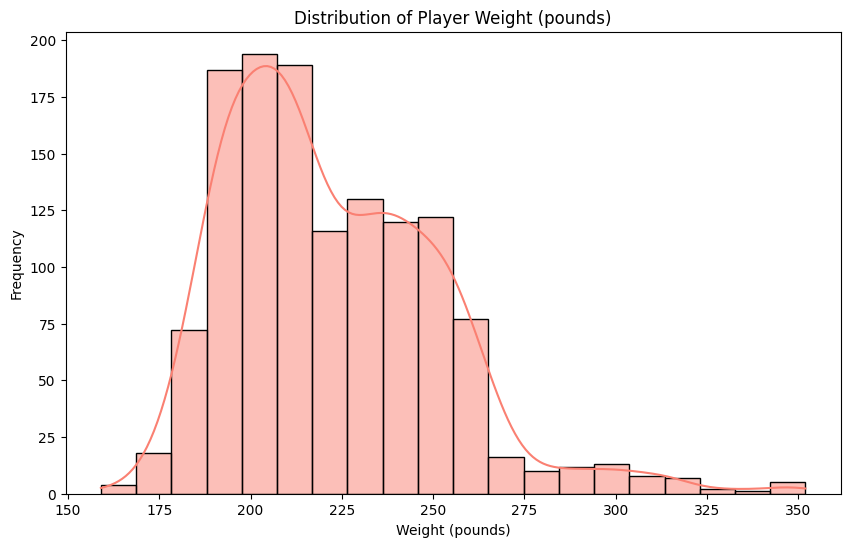

In [14]:
# Distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(Data['weight'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Player Weight (pounds)')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

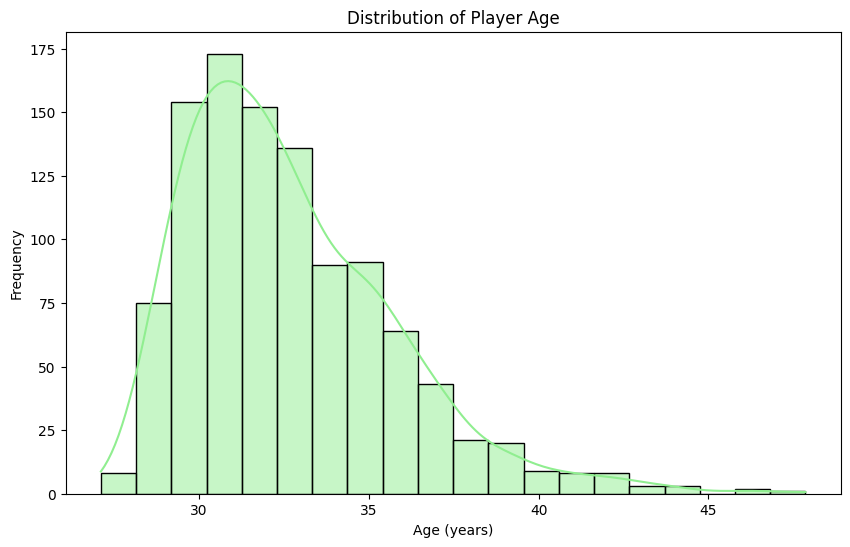

In [15]:
# Distribution of age (assuming age is calculated from birthdate)
# First, convert birthDate to datetime and calculate age
Data['birthDate'] = pd.to_datetime(Data['birthDate'], errors='coerce')
Data['age'] = (pd.to_datetime('now') - Data['birthDate']).dt.days / 365.25

plt.figure(figsize=(10, 6))
sns.histplot(Data['age'].dropna(), bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Player Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-1392141602>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts.values, y=college_counts.index, palette='coolwarm')


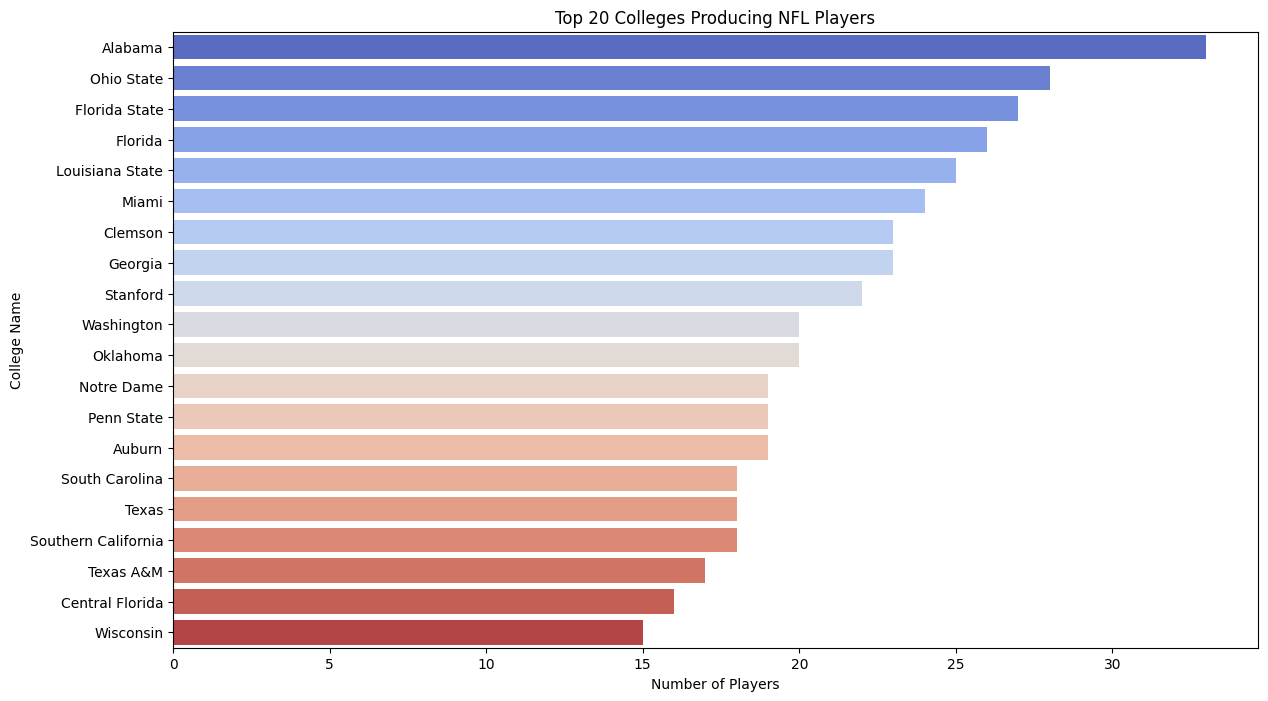

In [16]:
# Top Colleges producing NFL players
plt.figure(figsize=(14, 8))
college_counts = Data['collegeName'].value_counts().nlargest(20)
sns.barplot(x=college_counts.values, y=college_counts.index, palette='coolwarm')
plt.title('Top 20 Colleges Producing NFL Players')
plt.xlabel('Number of Players')
plt.ylabel('College Name')
plt.show()

#### b) BIVARIATE ANALYSIS

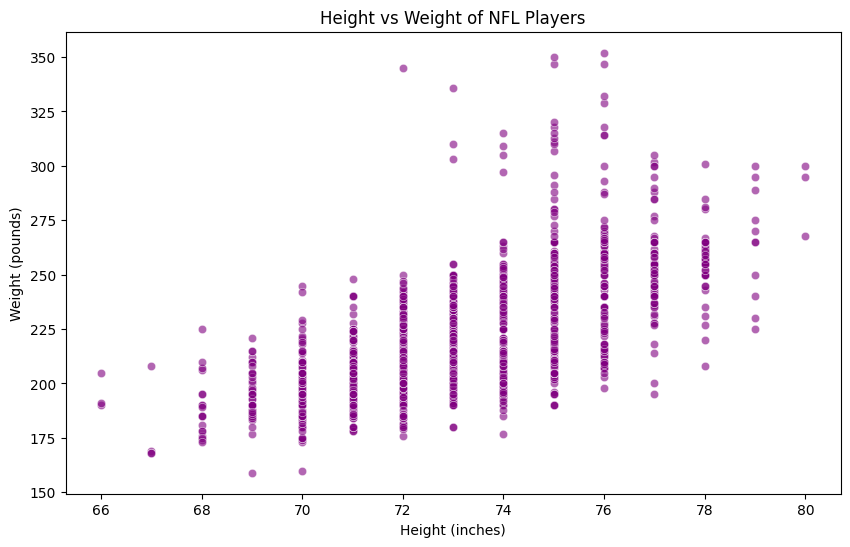

In [17]:
# Height vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=Data, alpha=0.6, color='purple')
plt.title('Height vs Weight of NFL Players')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

<ipython-input-27-2540998894>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='height', y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')


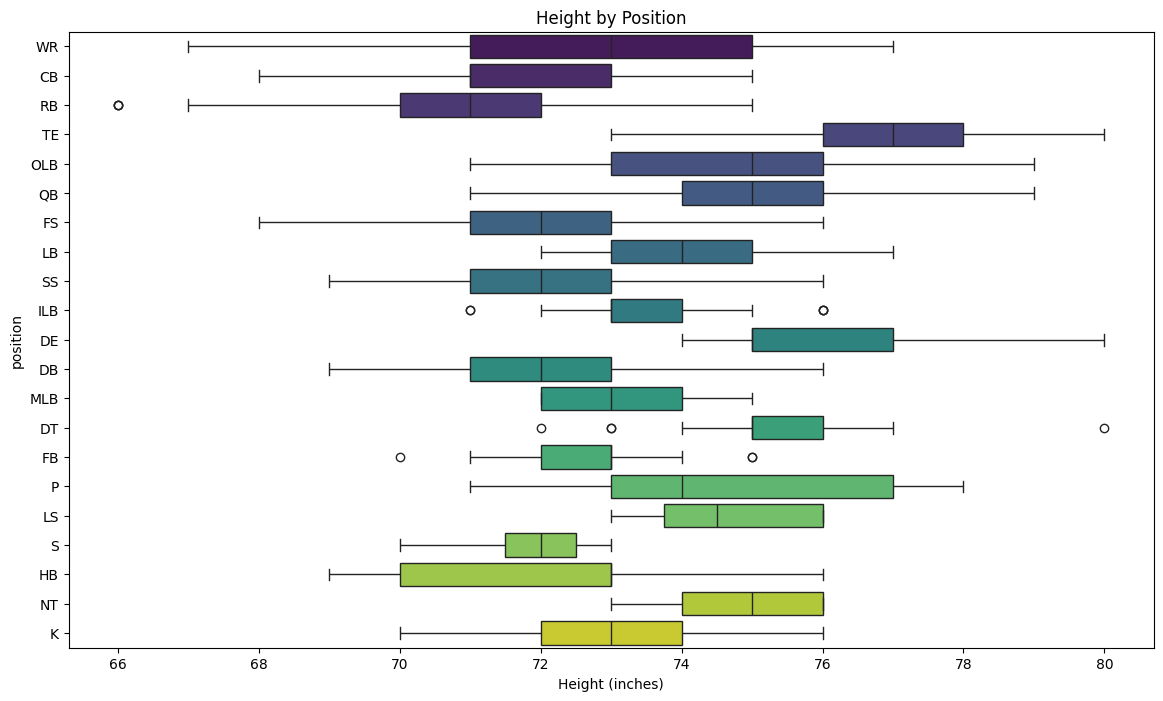

In [27]:
# Height by Position
plt.figure(figsize=(14, 8))
sns.boxplot(x='height', y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')
plt.title('Height by Position')
plt.xlabel('Height (inches)')
plt.show()

<ipython-input-19-3892304394>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight', y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')


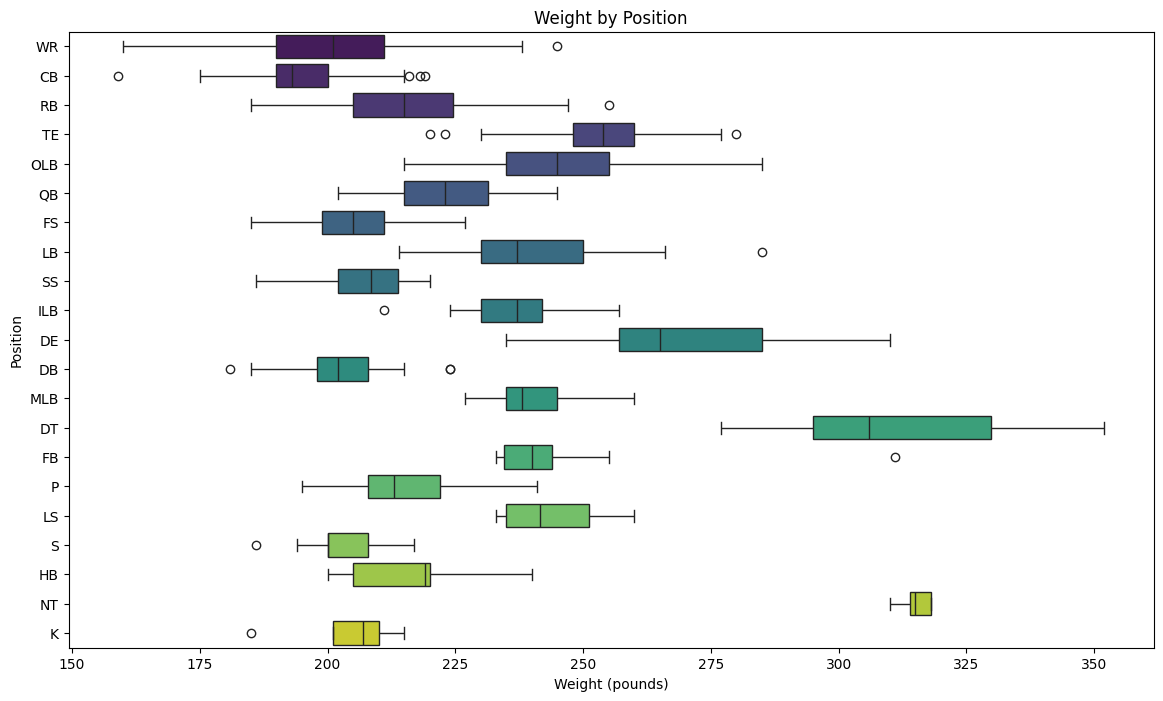

In [19]:
# Weight by Position
plt.figure(figsize=(14, 8))
sns.boxplot(x='weight', y='position', data=Data, order=Data['position'].value_counts().index, palette='viridis')
plt.title('Weight by Position')
plt.xlabel('Weight (pounds)')
plt.ylabel('Position')
plt.show()

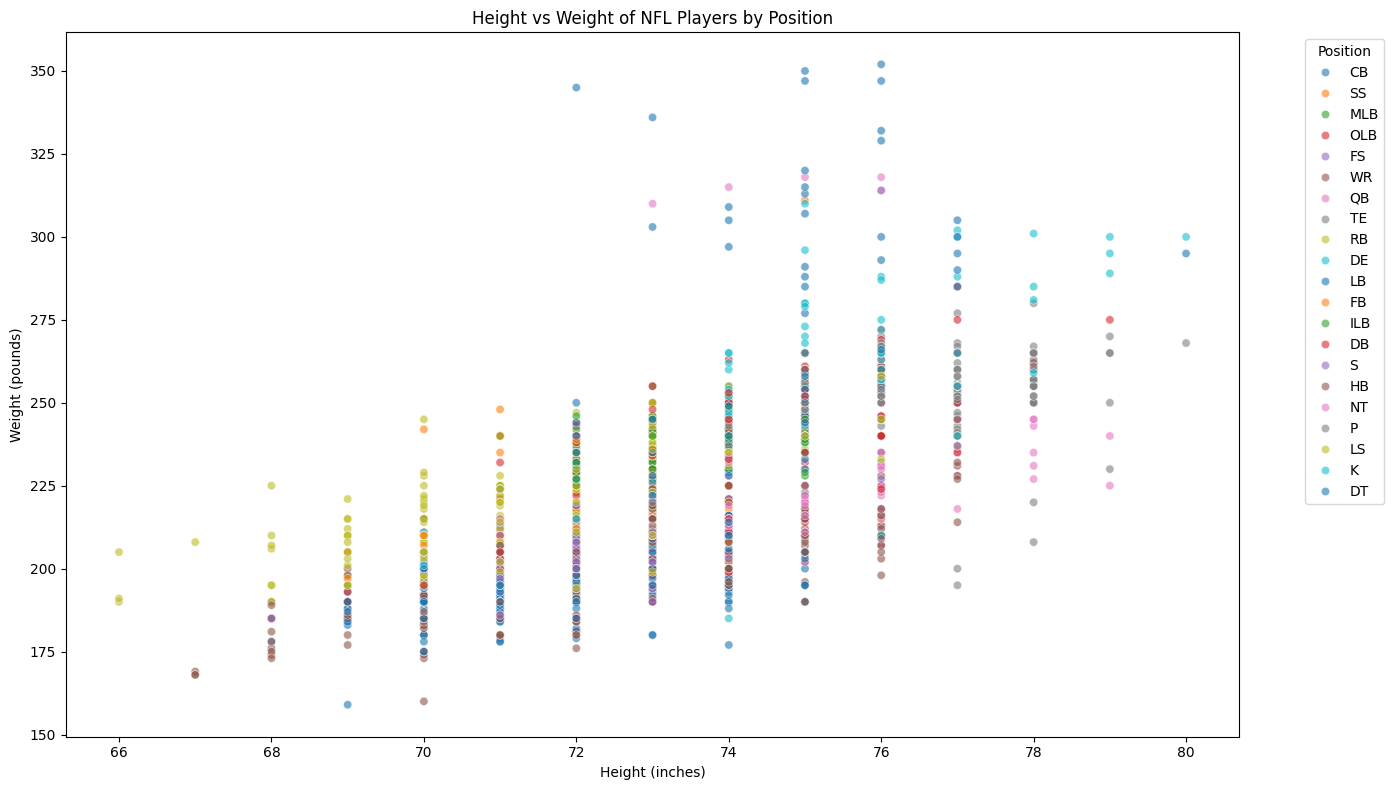

In [20]:
# Height vs Weight by Position (using hue)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='height', y='weight', hue='position', data=Data, alpha=0.6, palette='tab10')
plt.title('Height vs Weight of NFL Players by Position')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

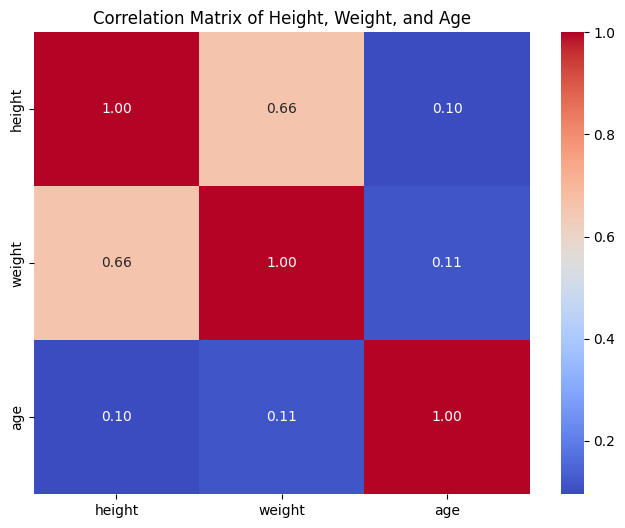

In [21]:
# Correlation heatmap for numerical columns
correlation_matrix = Data[['height', 'weight', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Height, Weight, and Age')
plt.show()